<a href="https://colab.research.google.com/github/masher5764/Stock-Price-Predication/blob/main/Stock_Price_Predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd
import requests

api_key = ""
ticker = "AAPL"
start_date = "2021-05-20"
end_date = "2025-03-28"

# Tiingo API URL for historical prices with date range
url = f"https://api.tiingo.com/tiingo/daily/{ticker}/prices?startDate={start_date}&endDate={end_date}&token={api_key}"

# Fetch data
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)

    # Save to CSV
    csv_filename = f"{ticker}_historical_prices.csv"
    df.to_csv(csv_filename, index=False)

    print(f"Data saved to {csv_filename}")
    print(df.head())
else:
    print("Error:", response.status_code, response.text)


Data saved to AAPL_historical_prices.csv
                       date   close    high     low     open    volume  \
0  2021-05-20T00:00:00.000Z  127.31  127.72  125.10  125.230  76857123   
1  2021-05-21T00:00:00.000Z  125.43  128.00  125.21  127.820  79295436   
2  2021-05-24T00:00:00.000Z  127.10  127.94  125.94  126.010  63092945   
3  2021-05-25T00:00:00.000Z  126.90  128.32  126.32  127.820  72009482   
4  2021-05-26T00:00:00.000Z  126.85  127.39  126.42  126.955  56575920   

     adjClose     adjHigh      adjLow     adjOpen  adjVolume  divCash  \
0  124.754877  125.156649  122.589232  122.716623   76857123      0.0   
1  122.912609  125.431029  122.697025  125.254642   79295436      0.0   
2  124.549092  125.372233  123.412373  123.480969   63092945      0.0   
3  124.353106  125.744607  123.784747  125.254642   72009482      0.0   
4  124.304110  124.833272  123.882740  124.407002   56575920      0.0   

   splitFactor  
0          1.0  
1          1.0  
2          1.0  
3      

In [3]:
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2021-05-20T00:00:00.000Z,127.31,127.72,125.10,125.230,76857123,124.754877,125.156649,122.589232,122.716623,76857123,0.0,1.0
1,2021-05-21T00:00:00.000Z,125.43,128.00,125.21,127.820,79295436,122.912609,125.431029,122.697025,125.254642,79295436,0.0,1.0
2,2021-05-24T00:00:00.000Z,127.10,127.94,125.94,126.010,63092945,124.549092,125.372233,123.412373,123.480969,63092945,0.0,1.0
3,2021-05-25T00:00:00.000Z,126.90,128.32,126.32,127.820,72009482,124.353106,125.744607,123.784747,125.254642,72009482,0.0,1.0
4,2021-05-26T00:00:00.000Z,126.85,127.39,126.42,126.955,56575920,124.304110,124.833272,123.882740,124.407002,56575920,0.0,1.0


In [4]:
df.tail()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
963,2025-03-21T00:00:00.000Z,218.27,218.84,211.2800,211.56,94127768,218.27,218.84,211.2800,211.56,94127768,0.0,1.0
964,2025-03-24T00:00:00.000Z,220.73,221.48,218.5800,221.00,44299483,220.73,221.48,218.5800,221.00,44299483,0.0,1.0
965,2025-03-25T00:00:00.000Z,223.75,224.10,220.0800,220.77,34493583,223.75,224.10,220.0800,220.77,34493583,0.0,1.0
966,2025-03-26T00:00:00.000Z,221.53,225.02,220.4700,223.51,34532656,221.53,225.02,220.4700,223.51,34532656,0.0,1.0
967,2025-03-27T00:00:00.000Z,223.85,224.99,220.5601,221.39,37094774,223.85,224.99,220.5601,221.39,37094774,0.0,1.0


In [5]:
data_close = df['close']

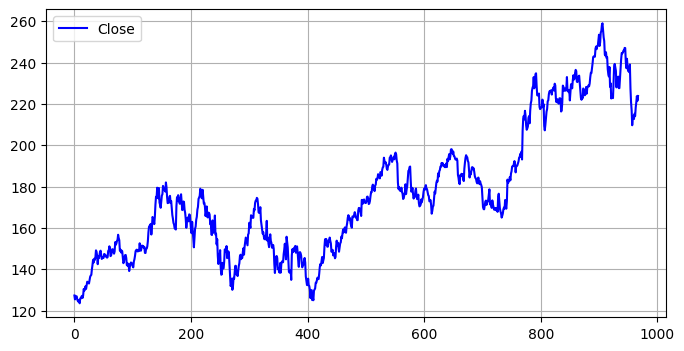

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(df['close'], label='Close', color='blue')

plt.legend()
plt.grid(True)

plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_close = scaler.fit_transform(np.array(data_close).reshape(-1,1))

In [8]:
training_size_close = int(len(data_close) * 0.65)
test_size_close = len(data_close)-training_size_close
train_data_close , test_data_close = data_close[0 : training_size_close, : ], data_close [training_size_close : len(data_close), :1]

In [9]:
training_size_close, test_size_close

(629, 339)

In [10]:
def create_dataset_close(dataset, time_step=1):
	dataX_close, dataY_close = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i : ( i + time_step), 0]
		dataX_close.append(a)
		dataY_close.append(dataset[i + time_step, 0])
	return np.array(dataX_close), np.array(dataY_close)

In [11]:
time_step = 60
X_train_close, y_train_close = create_dataset_close(train_data_close, time_step)
X_test_close, ytest_close = create_dataset_close(test_data_close, time_step)

In [12]:
print(X_train_close.shape), print(y_train_close.shape)
print(X_test_close.shape), print(ytest_close.shape)

(568, 60)
(568,)
(278, 60)
(278,)


(None, None)

In [13]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train_close = X_train_close.reshape(X_train_close.shape[0],X_train_close.shape[1] , 1)
X_test_close = X_test_close.reshape(X_test_close.shape[0],X_test_close.shape[1] , 1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

In [15]:
model=Sequential()

model.add(LSTM(30,return_sequences=True,input_shape=(60,1)))

model.add(LSTM(30,return_sequences=True))

model.add(LSTM(30))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 30)              │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 30)              │           7,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 30)                  │           7,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,511 (72.31 KB)

 Trainable params: 18,511 (72.31 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.fit(X_train_close,y_train_close, validation_data = (X_test_close, ytest_close) , epochs=60, batch_size = 48, verbose = 1)

Epoch 1/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 238ms/step - loss: 0.0497 - val_loss: 0.0212
Epoch 2/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0073 - val_loss: 0.0804
Epoch 3/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - loss: 0.0055 - val_loss: 0.0330
Epoch 4/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0045 - val_loss: 0.0336
Epoch 5/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0041 - val_loss: 0.0197
Epoch 6/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0036 - val_loss: 0.0102
Epoch 7/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 0.0034 - val_loss: 0.0055
Epoch 8/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 177ms/step - loss: 0.0038 - val_loss: 0.0077
Epoch 9/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0033 - val_loss: 0.0076
Epoch 10/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0030 - val_loss: 0.0070
Epoch 11/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0029 - val_loss: 0.0083
Epoch 12/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss

In [18]:
import tensorflow as tf

In [19]:
train_predict_close = model.predict(X_train_close)
test_predict_close = model.predict(X_test_close)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [20]:
train_predict_close = scaler.inverse_transform(train_predict_close)
test_predict_close = scaler.inverse_transform(test_predict_close)

In [21]:
import math
from sklearn.metrics import mean_squared_error

In [22]:
math.sqrt(mean_squared_error(y_train_close,train_predict_close))

161.79572697890333

In [23]:
math.sqrt(mean_squared_error(ytest_close,test_predict_close))

208.16780964065174

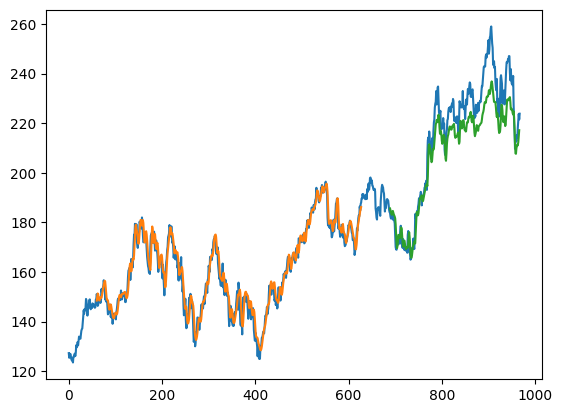

In [24]:
look_back = 60
trainPredictPlot = np.empty_like(data_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict_close) + look_back, :] = train_predict_close
# shift test predictions for plotting
testPredictPlot = np.empty_like(data_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict_close) + (look_back * 2) + 1:len(data_close) - 1, :] = test_predict_close
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [25]:
len(test_data_close)

339

In [26]:
x_input_close = test_data_close[279:].reshape(1,-1)
x_input_close.shape

(1, 60)

In [27]:
temp_input_close = list(x_input_close)
temp_input_close = temp_input_close[0].tolist()

In [28]:
from numpy import array

In [29]:
# demonstrate prediction for next 10 days

lst_output_close = []
n_steps=60
i=0
while(i < 30):

    if(len(temp_input_close) > 60):
        #print(temp_input_close)
        x_input_close = np.array(temp_input_close[1:])
        #print("{} day input {}".format(i,x_input_close))
        x_input_close = x_input_close.reshape(1,-1)
        x_input_close = x_input_close.reshape((1, n_steps, 1))
        #print(x_input_close)
        yhat_close = model.predict(x_input_close, verbose=0)
        print("{} day output {}".format(i,yhat_close))
        temp_input_close.extend(yhat_close[0].tolist())
        temp_input_close = temp_input_close[1:]
        #print(temp_input_close)
        lst_output_close.extend(yhat_close.tolist())
        i=i+1
    else:
        x_input_close = x_input_close.reshape((1, n_steps,1))
        yhat_close = model.predict(x_input_close, verbose=0)
        #print(yhat_close[0])
        temp_input_close.extend(yhat_close[0].tolist())
        #print(len(temp_input_close))
        lst_output_close.extend(yhat_close.tolist())
        i=i+1


print(lst_output_close)

1 day output [[0.67007494]]
2 day output [[0.6458543]]
3 day output [[0.62431735]]
4 day output [[0.60756123]]
5 day output [[0.59463537]]
6 day output [[0.5843308]]
7 day output [[0.5761302]]
8 day output [[0.5699443]]
9 day output [[0.5656606]]
10 day output [[0.5629745]]
11 day output [[0.5614567]]
12 day output [[0.56067866]]
13 day output [[0.5602804]]
14 day output [[0.55998665]]
15 day output [[0.55959225]]
16 day output [[0.5589526]]
17 day output [[0.5579787]]
18 day output [[0.55663455]]
19 day output [[0.5549294]]
20 day output [[0.5529099]]
21 day output [[0.55064553]]
22 day output [[0.54821926]]
23 day output [[0.54571605]]
24 day output [[0.54321706]]
25 day output [[0.5407933]]
26 day output [[0.53850293]]
27 day output [[0.53638935]]
28 day output [[0.5344798]]
29 day output [[0.5327881]]
[[0.6891586184501648], [0.6700749397277832], [0.6458542943000793], [0.6243173480033875], [0.6075612306594849], [0.5946353673934937], [0.5843307971954346], [0.576130211353302], [0.5699

In [30]:
day_new_close = np.arange(1,61)
day_pred_close = np.arange(61,91)

In [31]:
len(data_close)

968

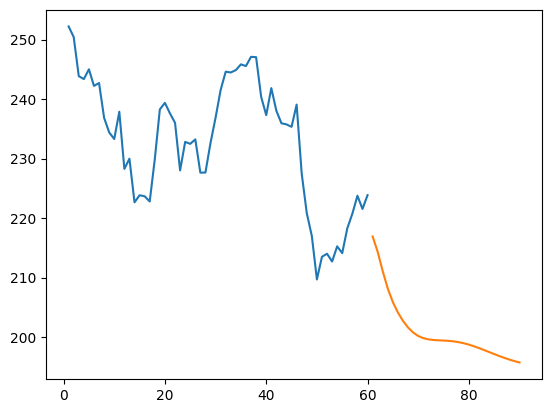

In [32]:
plt.plot(day_new_close,scaler.inverse_transform(data_close[908:]))
plt.plot(day_pred_close,scaler.inverse_transform(lst_output_close))

In [33]:
data_open = df['open']

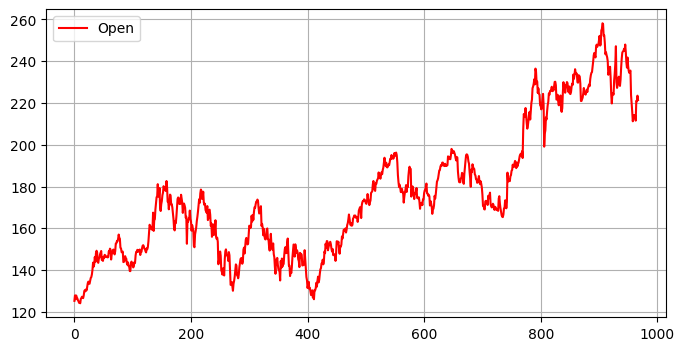

In [34]:
plt.figure(figsize=(8, 4))
plt.plot(df['open'], label='Open', color='red')

plt.legend()
plt.grid(True)

plt.show()

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_open = scaler.fit_transform(np.array(data_open).reshape(-1,1))

In [36]:
training_size_open = int(len(data_open) * 0.65)
test_size_open = len(data_open)-training_size_open
train_data_open , test_data_open = data_open[0 : training_size_open,:], data_open [training_size_open : len(data_open), :1]

In [37]:
training_size_open, test_size_open

(629, 339)

In [38]:
def create_dataset_open(dataset, time_step=1):
	dataX_open, dataY_open = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i : ( i + time_step), 0]
		dataX_open.append(a)
		dataY_open.append(dataset[i + time_step, 0])
	return np.array(dataX_open), np.array(dataY_open)

In [39]:
time_step = 60
X_train_open, y_train_open = create_dataset_open(train_data_open, time_step)
X_test_open, ytest_open = create_dataset_open(test_data_open, time_step)

In [40]:
print(X_train_open.shape), print(y_train_open.shape)
print(X_test_open.shape), print(ytest_open.shape)

(568, 60)
(568,)
(278, 60)
(278,)


(None, None)

In [41]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train_open = X_train_open.reshape(X_train_open.shape[0],X_train_open.shape[1] , 1)
X_test_open = X_test_open.reshape(X_test_open.shape[0],X_test_open.shape[1] , 1)

In [42]:
model_open = Sequential()

model_open.add(LSTM(30,return_sequences=True,input_shape=(60,1)))

model_open.add(LSTM(30,return_sequences=True))

model_open.add(LSTM(30))

model_open.add(Dense(1))

model_open.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model_open.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 60, 30)              │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 60, 30)              │           7,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 30)                  │           7,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,511 (72.31 KB)

 Trainable params: 18,511 (72.31 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model_open.fit(X_train_open, y_train_open, validation_data = (X_test_open, ytest_open), epochs=60, batch_size=48, verbose = 1)

Epoch 1/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - loss: 0.0280 - val_loss: 0.0400
Epoch 2/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - loss: 0.0055 - val_loss: 0.0261
Epoch 3/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 0.0054 - val_loss: 0.0363
Epoch 4/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0049 - val_loss: 0.0220
Epoch 5/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0038 - val_loss: 0.0081
Epoch 6/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0038 - val_loss: 0.0073
Epoch 7/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0034 - val_loss: 0.0074
Epoch 8/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0029 - val_loss: 0.0089
Epoch 9/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0030 - val_loss: 0.0057
Epoch 10/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0028 - val_loss: 0.0055
Epoch 11/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0027 - val_loss: 0.0044
Epoch 12/60
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - loss: 

In [45]:
train_predict_open = model_open.predict(X_train_open)
test_predict_open = model_open.predict(X_test_open)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [46]:
train_predict_open = scaler.inverse_transform(train_predict_open)
test_predict_open = scaler.inverse_transform(test_predict_open)

In [47]:
math.sqrt(mean_squared_error(y_train_open,train_predict_open))

160.78567793973903

In [48]:
math.sqrt(mean_squared_error(ytest_open,test_predict_open))

212.06343581735837

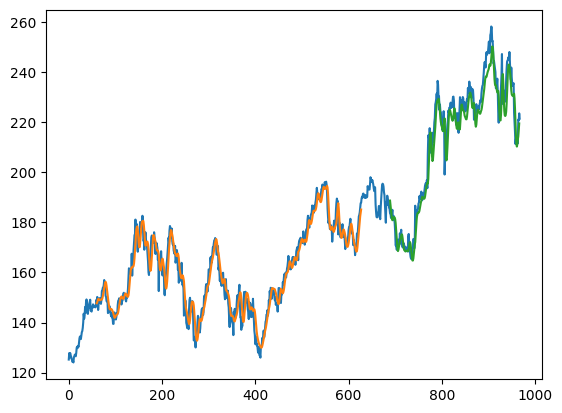

In [49]:
look_back = 60
trainPredictPlot = np.empty_like(data_open)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict_open) + look_back, :] = train_predict_open
# shift test predictions for plotting
testPredictPlot = np.empty_like(data_open)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict_open) + (look_back * 2) + 1:len(data_open) - 1, :] = test_predict_open
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data_open))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [55]:
len (test_data_open)

339

In [56]:
x_input_open = test_data_open[279:].reshape(1,-1)
x_input_open.shape

(1, 60)

In [57]:
temp_input_open = list(x_input_open)
temp_input_open = temp_input_open[0].tolist()

In [58]:
# demonstrate prediction for next 10 days

lst_output_open = []
n_steps=60
i=0
while(i<30):

    if(len(temp_input_open) > 60):
        #print(temp_input_open)
        x_input_open = np.array(temp_input_open[1:])
        #print("{} day input {}".format(i,x_input_open))
        x_input_open = x_input_open.reshape(1,-1)
        x_input_open = x_input_open.reshape((1, n_steps, 1))
        #print(x_input_open)
        yhat_open = model.predict(x_input_open, verbose=0)
        print("{} day output {}".format(i,yhat_open))
        temp_input_open.extend(yhat_open[0].tolist())
        temp_input_open = temp_input_open[1:]
        #print(temp_input_open)
        lst_output_open.extend(yhat_open.tolist())
        i=i+1
    else:
        x_input_open = x_input_open.reshape((1, n_steps,1))
        yhat_open = model.predict(x_input_open, verbose=0)
        #print(yhat_open[0])
        temp_input_open.extend(yhat_open[0].tolist())
        #print(len(temp_input_open))
        lst_output_open.extend(yhat_open.tolist())
        i=i+1


print(lst_output_open)

1 day output [[0.67151636]]
2 day output [[0.64563]]
3 day output [[0.624584]]
4 day output [[0.6089724]]
5 day output [[0.59673494]]
6 day output [[0.5864853]]
7 day output [[0.5780004]]
8 day output [[0.5714666]]
9 day output [[0.56687003]]
10 day output [[0.56389153]]
11 day output [[0.56207603]]
12 day output [[0.56099695]]
13 day output [[0.5603201]]
14 day output [[0.5597932]]
15 day output [[0.559224]]
16 day output [[0.5584683]]
17 day output [[0.55743206]]
18 day output [[0.55607134]]
19 day output [[0.5543873]]
20 day output [[0.55241686]]
21 day output [[0.5502208]]
22 day output [[0.5478722]]
23 day output [[0.5454493]]
24 day output [[0.54302657]]
25 day output [[0.54067063]]
26 day output [[0.53843653]]
27 day output [[0.53636605]]
28 day output [[0.5344866]]
29 day output [[0.53281224]]
[[0.6939724683761597], [0.6715163588523865], [0.6456300020217896], [0.6245840191841125], [0.6089723706245422], [0.5967349410057068], [0.5864853262901306], [0.5780004262924194], [0.5714666

In [59]:
day_new_open = np.arange(1,61)
day_pred_open = np.arange(61,91)

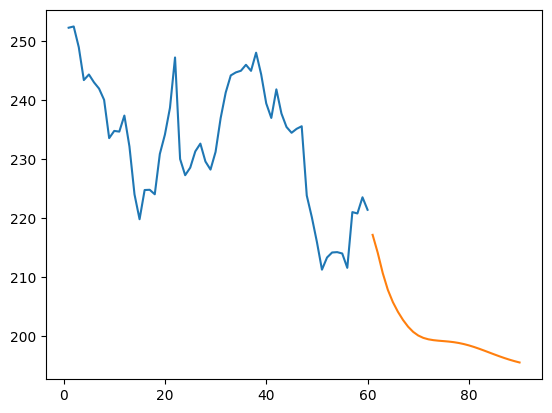

In [60]:
plt.plot(day_new_close,scaler.inverse_transform(data_open[908:]))
plt.plot(day_pred_close,scaler.inverse_transform(lst_output_open))

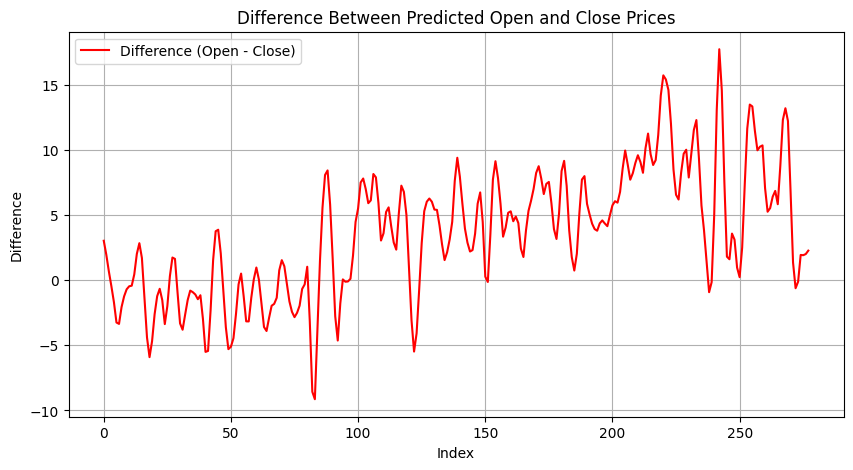

Number of uptrend (Close > Open): 201
Number of downtrend (Close < Open): 77


In [68]:
# Compute absolute differences
differences = test_predict_open - test_predict_close

# Plot the differences
plt.figure(figsize=(10, 5))
plt.plot(differences, label="Difference (Open - Close)", color="red")
plt.xlabel("Index")
plt.ylabel("Difference")
plt.title("Difference Between Predicted Open and Close Prices")
plt.legend()
plt.grid(True)
plt.show()
# Count positive and negative differences
uptrend = np.sum(differences > 0)
downtrend = np.sum(differences < 0)

print("Number of uptrend (Close > Open):", uptrend)
print("Number of downtrend (Close < Open):", downtrend)

Number of Uptrend Days (Close > Open): 0
Number of Downtrend Days (Close < Open): 30
Number of Consolidation Days (Close = Open): 0
Average Daily Price Range: 0.05
Standard Deviation of Daily Price Range: 0.04
Number of Gap-Up Days: 29
Number of Gap-Down Days: 0
Support Level (Minimum Close Price): 0.5177386403083801
Resistance Level (Maximum Close Price): 0.5313138365745544


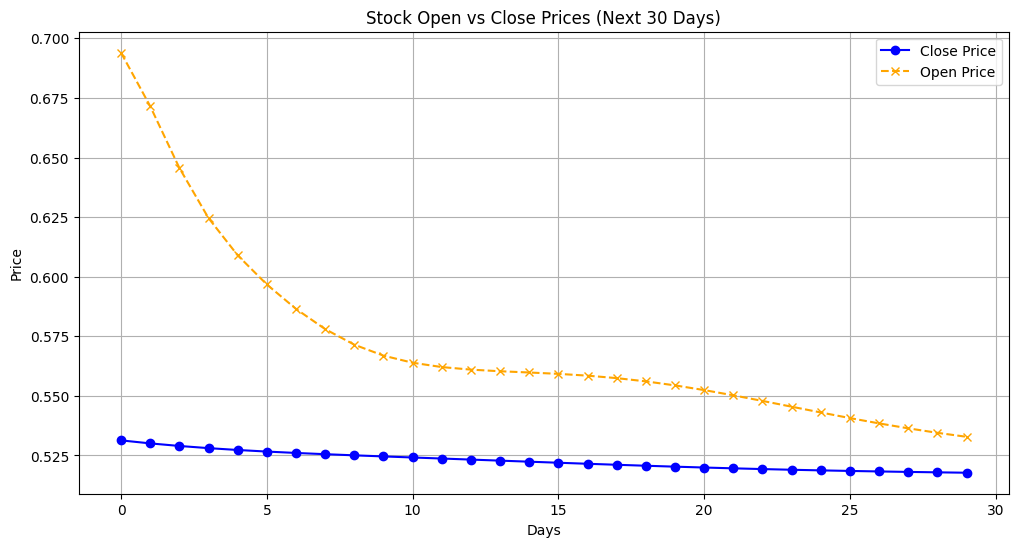

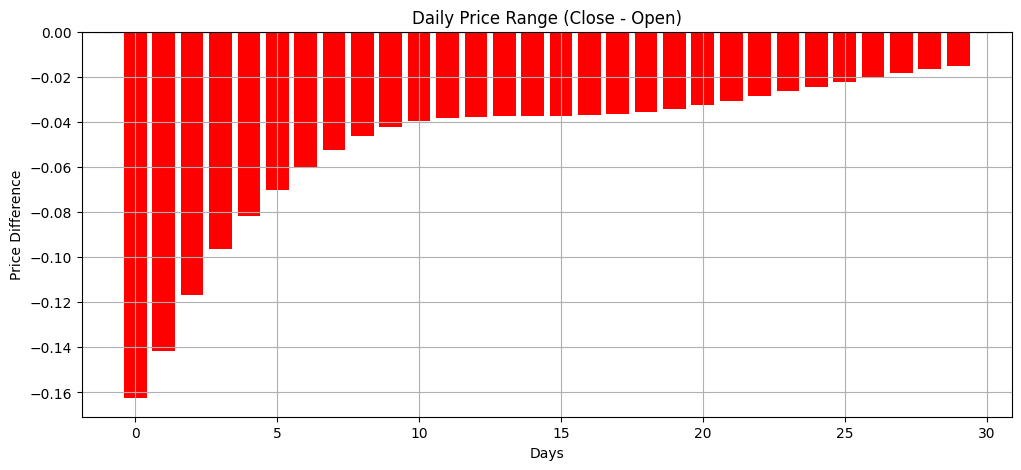

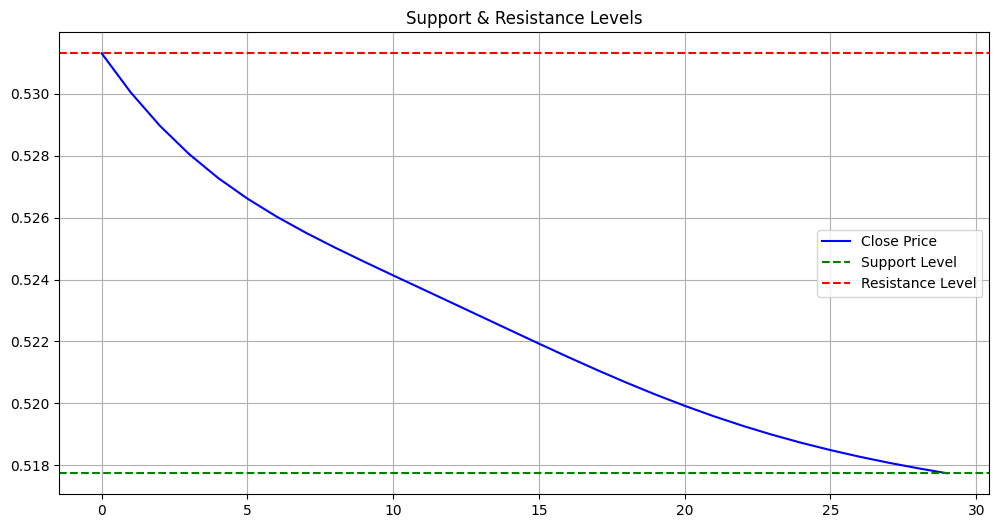

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming lst_output_open and lst_output_close are given lists
lst_output_open = np.array(lst_output_open)
lst_output_close = np.array(lst_output_close)

# Ensure both lists have the same length
assert len(lst_output_open) == len(lst_output_close), "Data length mismatch!"

# Compute Trend Analysis
uptrend = np.sum(lst_output_close > lst_output_open)
downtrend = np.sum(lst_output_close < lst_output_open)
consolidation = np.sum(lst_output_close == lst_output_open)

print("Number of Uptrend Days (Close > Open):", uptrend)
print("Number of Downtrend Days (Close < Open):", downtrend)
print("Number of Consolidation Days (Close = Open):", consolidation)

# Compute Daily Price Range (Volatility)
daily_range = lst_output_close - lst_output_open
average_range = np.mean(np.abs(daily_range))
std_dev_range = np.std(daily_range)

print("Average Daily Price Range:", round(average_range, 2))
print("Standard Deviation of Daily Price Range:", round(std_dev_range, 2))

# Compute Gap-Up and Gap-Down
previous_close = np.roll(lst_output_close, shift=1)
gap_up = np.sum(lst_output_open[1:] > previous_close[1:])
gap_down = np.sum(lst_output_open[1:] < previous_close[1:])

print("Number of Gap-Up Days:", gap_up)
print("Number of Gap-Down Days:", gap_down)

# Compute Support & Resistance Levels
support_level = np.min(lst_output_close)
resistance_level = np.max(lst_output_close)

print("Support Level (Minimum Close Price):", support_level)
print("Resistance Level (Maximum Close Price):", resistance_level)

# Plot Open vs Close Prices
plt.figure(figsize=(12, 6))
plt.plot(lst_output_close, label="Close Price", color="blue", marker="o")
plt.plot(lst_output_open, label="Open Price", color="orange", linestyle="dashed", marker="x")
plt.title("Stock Open vs Close Prices (Next 30 Days)")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

# Plot Daily Price Range
plt.figure(figsize=(12, 5))
plt.bar(range(len(daily_range)), daily_range.flatten(), color=["green" if x > 0 else "red" for x in daily_range.flatten()]) # Flatten daily_range
plt.axhline(0, color="black", linestyle="dashed")
plt.title("Daily Price Range (Close - Open)")
plt.xlabel("Days")
plt.ylabel("Price Difference")
plt.grid()
plt.show()

# Plot Support & Resistance Levels
plt.figure(figsize=(12, 6))
plt.plot(lst_output_close, label="Close Price", color="blue")
plt.axhline(support_level, color="green", linestyle="dashed", label="Support Level")
plt.axhline(resistance_level, color="red", linestyle="dashed", label="Resistance Level")
plt.title("Support & Resistance Levels")
plt.legend()
plt.grid()
plt.show()


1. **Number of Uptrend Days (Close > Open): 0**
👉 No uptrend days means that the stock never closed higher than it opened in the last 30 days. This indicates a bearish market sentiment—sellers dominated every trading day.

2. **Number of Downtrend Days (Close < Open): 30**
👉 All 30 days were downtrend days, meaning the stock closed lower than it opened every single day.
✅ This suggests consistent selling pressure and a strong downward trend over the 30-day period.

3. **Number of Consolidation Days (Close = Open): 0**
👉 No days where the Open and Close were the same, meaning there was always some movement during the trading day.
✅ Consolidation usually happens when a stock is trading sideways without a clear trend.
❌ Since 0 consolidation days, there was no sideways movement, and the stock kept falling.

4. **Average Daily Price Range: 0.05**
👉 This represents how much the stock moves on average per day between Open and Close.
✅ 0.05 is a relatively small movement, meaning low volatility (small price fluctuations per day).
📉 If this was higher (e.g., 1.0), it would indicate high volatility.

5. **Standard Deviation of Daily Price Range: 0.04**
👉 This measures the variability of the stock's daily movement.
✅ A low standard deviation (0.04) suggests that the stock's daily price movement is fairly stable (not fluctuating much).
📉 Higher standard deviation would mean more unpredictable price swings.

6. **Number of Gap-Up Days: 29**
👉 A gap-up happens when a stock’s opening price is higher than the previous day's closing price.
✅ 29 gap-up days out of 30 suggests a strong bullish sentiment at the market open.
🚨 However, since every day still ended lower than it opened (downtrend), this means that:


*   Investors initially pushed the price up at market open (possibly due to news or pre-market activity).
*   But by the end of the day, sellers took control, pushing the price lower.






7. **Number of Gap-Down Days: 0**
👉 No gap-down days means that the stock never opened lower than the previous day's closing price.
✅ This suggests that pre-market traders and overnight sentiment were positive.
🚨 However, since every day still ended in a downtrend, it means sellers dominated the intraday action.

8. **Support Level (Minimum Close Price): 0.5177**
👉 Support Level is the lowest closing price in the 30-day period.
✅ This is a critical price level where the stock might find buying support and bounce back up.

9. **Resistance Level (Maximum Close Price): 0.5313**
👉 Resistance Level is the highest closing price in the 30-day period.
✅ This is a key price level where the stock struggled to go above, meaning sellers were strong around this price.